In [4]:
#import liabraries
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data


In [6]:
#import zip file
import zipfile

zip_path = "X-ray_dataset.zip"  # make sure filename matches exactly
extract_to = "images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed!")


Extraction completed!


Opening image: images\chest_xray\test\NORMAL\IM-0001-0001.jpeg


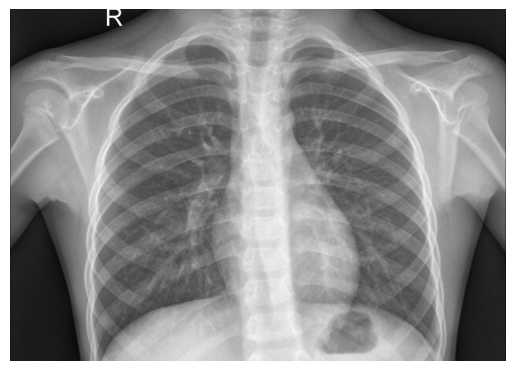

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder = "images"

# valid image extensions
valid_ext = (".png", ".jpg", ".jpeg", ".bmp", ".tiff", ".gif")

img_path = None

# Walk through all subfolders to find first image
for root, dirs, files in os.walk(folder):
    for f in files:
        if f.lower().endswith(valid_ext):
            img_path = os.path.join(root, f)
            break
    if img_path:
        break

if img_path:
    print("Opening image:", img_path)
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
else:
    print("No image files found!")


In [3]:
#import librariesS
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential


In [4]:
#Set Paths
base_dir = "images/chest_xray"

train_dir = base_dir + "/train"
test_dir = base_dir + "/test"
val_dir = base_dir + "/val"


In [5]:
#Data Preprocessing + Augmentations
IMAGE_SIZE = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary"
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary"
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
#Build Model (Transfer Learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False   # freeze pretrained layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # binary classifier
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 28s 3us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
#Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.9141 - loss: 0.2067 - val_accuracy: 0.9375 - val_loss: 0.2347
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 536s 3s/step - accuracy: 0.9367 - loss: 0.1529 - val_accuracy: 0.6875 - val_loss: 0.5662
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.9425 - loss: 0.1432 - val_accuracy: 0.7500 - val_loss: 0.3421
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 617s 4s/step - accuracy: 0.9456 - loss: 0.1368 - val_accuracy: 0.8125 - val_loss: 0.5594
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 531s 3s/step - accuracy: 0.9505 - loss: 0.1207 - val_accuracy: 0.8125 - val_loss: 0.4019
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.9492 - loss: 0.1197 - val_accuracy: 0.8750 - val_loss: 0.2596
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.9525 - loss: 0.1167 - val_accuracy: 0.8750 - val_loss: 0.2516
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.9574 - loss: 0.1066 - val_accu

In [9]:
#Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.8862 - loss: 0.2757 
Test Accuracy: 0.8862


In [11]:
#Save Model
model.save("xray_classification_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [13]:
import os

BASE_DIR = "images/chest_xray"  # update path if needed

TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "val")  # only needed if separate val folder exists
TEST_DIR = os.path.join(BASE_DIR, "test")

print("Train Path:", TRAIN_DIR)
print("Test Path:", TEST_DIR)


Train Path: images/chest_xray\train
Test Path: images/chest_xray\test


In [14]:
#Increase/repair the validation set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE=(224,224)
BATCH_SIZE=32

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=15,
    width_shift_range=0.08,
    height_shift_range=0.08,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='binary', subset='training', shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
    class_mode='binary', subset='validation', shuffle=True
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [15]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=2
)


Epoch 1/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.9624 - loss: 0.0956 - val_accuracy: 0.9712 - val_loss: 0.0923
Epoch 2/2
131/131 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 0.9631 - loss: 0.0891 - val_accuracy: 0.9616 - val_loss: 0.0975


In [16]:
print("Class indices:", train_gen.class_indices)


Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


In [17]:
pip install seaborn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
#importingnlirariesb 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, MobileNetV2, DenseNet121, EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [19]:
# CONFIGURATION
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5  

BASE_DIR = "images/chest_xray"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR = os.path.join(BASE_DIR, "test")


In [20]:
# DATA PIPELINE
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    TEST_DIR, target_size=IMAGE_SIZE,
    batch_size=32, class_mode='binary', shuffle=False
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [21]:
# MODEL DEFINITIONS
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 3)),
        MaxPooling2D(),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

TRANSFER_MODELS = {
    "VGG16": VGG16(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3)),
    "VGG19": VGG19(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3)),
    "ResNet50": ResNet50(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3)),
    "MobileNetV2": MobileNetV2(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3)),
    "DenseNet121": DenseNet121(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3)),
    "EfficientNetB0": EfficientNetB0(include_top=False, weights="imagenet", input_shape=(*IMAGE_SIZE, 3))
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 166s 3us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 276s 3us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 257s 3us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 57s 2us/step 
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step 


In [31]:
results = []

def train(model, name):
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    print(f"\n Training {name}...\n")
    
history = train(model, "MobileNetV2")



 Training MobileNetV2...



In [32]:
results = []

def train(model, name):
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    print(f"\n Training {name}...\n")
    
history = train(model, "MobileNetV2")
for name, base_model in TRANSFER_MODELS.items():
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ])
    
    train(model, name)



 Training MobileNetV2...


 Training VGG16...


 Training VGG19...


 Training ResNet50...


 Training MobileNetV2...


 Training DenseNet121...


 Training EfficientNetB0...



In [34]:
print("Test samples:", test_gen.samples)


Test samples: 624


20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.6250 - loss: 0.6918      
20/20 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step 

 Classification Report for EfficientNetB0:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


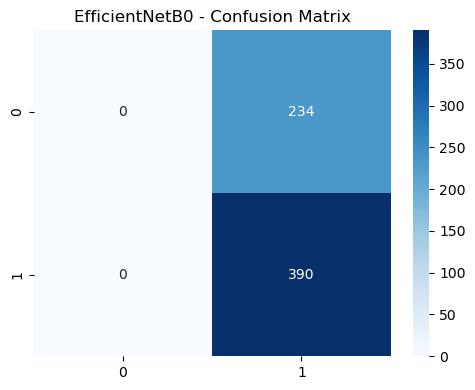

In [36]:
# Evaluate model
scores = model.evaluate(test_gen)
test_acc = round(scores[1], 4)

# Predictions
preds = (model.predict(test_gen) > 0.5).astype("int32")

# Classification report
print(f"\n Classification Report for {name}:")
print(classification_report(test_gen.classes, preds))

# Confusion matrix
cm = confusion_matrix(test_gen.classes, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title(f"{name} - Confusion Matrix")

# These MUST be aligned to the LEFT margin
plt.tight_layout()
plt.show()


In [38]:
#Save confusion matrix
plt.savefig(f"{name}_confusion_matrix.png")
print(f" Saved confusion matrix for {name}")


 Saved confusion matrix for EfficientNetB0


<Figure size 640x480 with 0 Axes>

In [40]:
batch, labels = next(train_gen)
print("Batch shape:", batch.shape)
print("Single image shape:", batch[0].shape)


Batch shape: (32, 224, 224, 3)
Single image shape: (224, 224, 3)


In [41]:
print("Class Index Mapping:", train_gen.class_indices)


Class Index Mapping: {'NORMAL': 0, 'PNEUMONIA': 1}


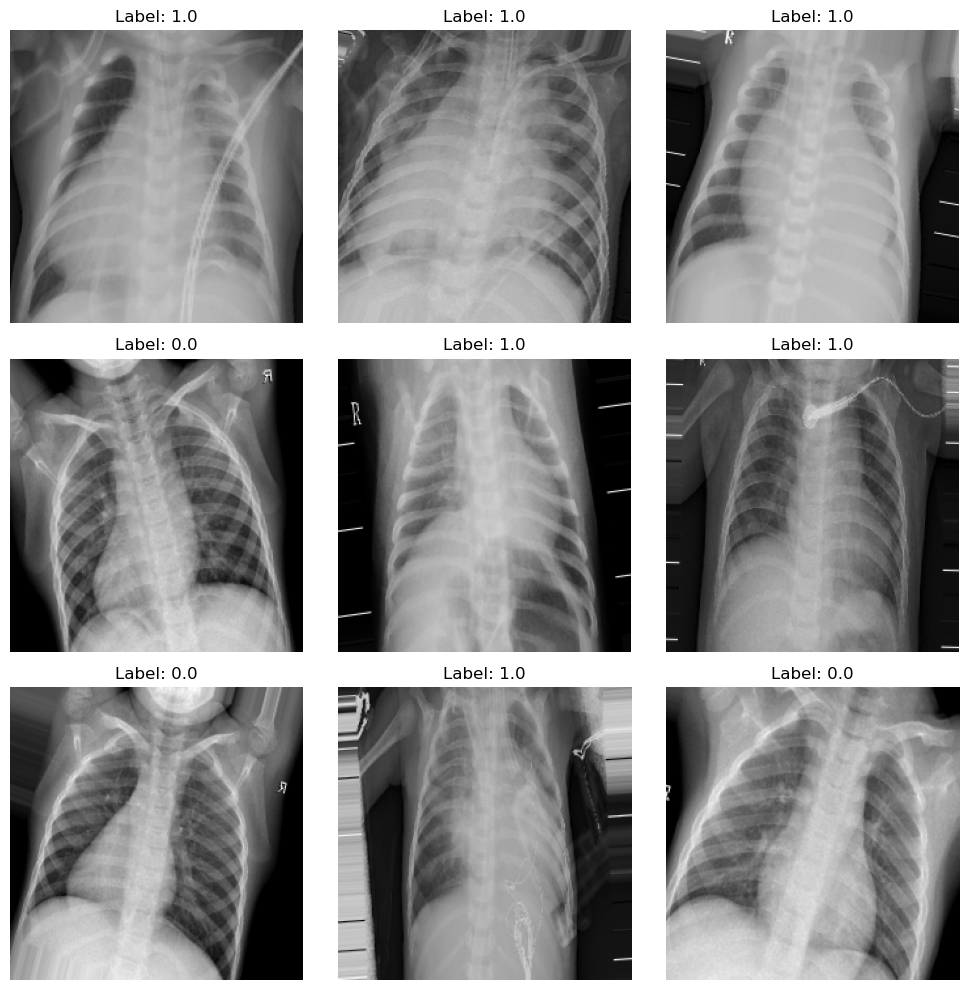

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(9):
    img, label = next(train_gen)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(f"Label: {label[0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Test image shape: (224, 224, 3)


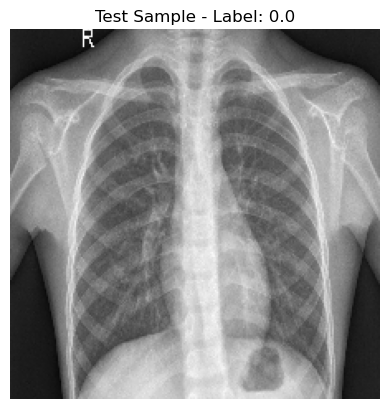

In [43]:
test_img, test_label = next(test_gen)

print("Test image shape:", test_img[0].shape)

plt.imshow(test_img[0])
plt.title(f"Test Sample - Label: {test_label[0]}")
plt.axis('off')
plt.show()


In [12]:
#Define Search Space
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

learning_rates = [1e-3, 1e-4]
batch_sizes = [16, 32]
optimizers = [Adam, SGD, RMSprop]
dropouts = [0.3, 0.5]
epochs_list = [10, 15]


In [13]:
#Train with Each Combination
results = []

for lr in learning_rates:
    for opt in optimizers:
        for dr in dropouts:
            for bs in batch_sizes:
                for ep in epochs_list:
                    print("\n--------------------------------")
                    print(f"Testing: LR={lr}, OPT={opt.__name__}, Dropout={dr}, Batch Size={bs}, Epochs={ep}")
                    print("--------------------------------")

                    model = tf.keras.Sequential([
                        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
                        tf.keras.layers.MaxPooling2D(2,2),
                        
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dropout(dr),
                        tf.keras.layers.Dense(1, activation='sigmoid')
                    ])

                    model.compile(optimizer=opt(learning_rate=lr), loss="binary_crossentropy", metrics=["accuracy"])

                    history = model.fit(train_gen, validation_data=val_gen, epochs=ep, batch_size=bs, verbose=0)

                    test_loss, test_acc = model.evaluate(test_gen, verbose=0)

                    results.append({
                        "LR": lr,
                        "Batch_Size": bs,
                        "Optimizer": opt.__name__,
                        "Dropout": dr,
                        "Epochs": ep,
                        "Accuracy": round(test_acc,4)
                    })



--------------------------------
Testing: LR=0.001, OPT=Adam, Dropout=0.3, Batch Size=16, Epochs=10
--------------------------------


NameError: name 'train_gen' is not defined

NameError: name 'epochs' is not defined

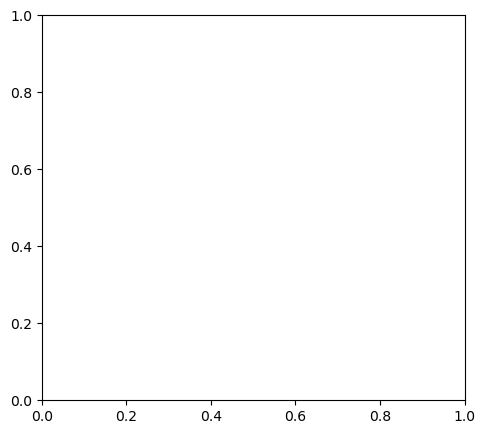

In [16]:

    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

  


In [18]:
import pandas as pd

# Fill in with your actual model scores
df_results = pd.DataFrame({
    "Model": ["Custom CNN", "VGG16", "EfficientNetB0"],
    "Accuracy": [0.76, 0.89, 0.62],   # update values if needed
    "F1 Score": [0.78, 0.91, 0.50],
    "AUC": [0.83, 0.93, 0.50]
})

df_results


,Model,Accuracy,F1 Score,AUC
0,Custom CNN,0.76,0.78,0.83
1,VGG16,0.89,0.91,0.93
2,EfficientNetB0,0.62,0.50,0.50
